In [1]:
import pandas as pd
raw_data = pd.read_csv(r'./data/github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

##### 1. 删除重复数据，并输出去重前后的数据量

In [2]:
print("去重前数据量：{}".format(data.index.size))
#去重
data = data.drop_duplicates()
print("去重后数据量：{}".format(data.index.size))

去重前数据量：20358
去重后数据量：19779


##### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值

In [3]:
#去除gravatar_id列
data = data.drop('gravatar_id',axis=1)
print("各列缺失值数量统计：")
print(data.isnull().sum())

各列缺失值数量统计：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [4]:
#将能转化为boolean变量的值进行转换
data['name']=data['name'].astype(bool)
data['company']=data['company'].astype(bool)
data['blog']=data['blog'].astype(bool)
data['location']=data['location'].astype(bool)
data['email']=data['email'].astype(bool)
data['hireable']=data['hireable'].astype(bool)
data['bio']=data['bio'].astype(bool)
data['twitter_username']=data['twitter_username'].astype(bool)
print("转化后缺值情况：")
data.isnull().sum()

转化后缺值情况：


actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64

##### 3.数据变换

In [5]:
#将create_at,updated_at转化为时间戳
#先将字符串转化为datetime
data['created_at']=pd.to_datetime(data['created_at'],format="%Y-%m-%dT%H:%M:%SZ")
data['updated_at']=pd.to_datetime(data['updated_at'],format="%Y-%m-%dT%H:%M:%SZ")
#再将datetime转化为时间戳
data['created_at']=data['created_at'].astype('int64')
data['updated_at']=data['updated_at'].astype('int64')
data


,actor_id,label,login,id,node_id,avatar_url,url,html_url,followers_url,following_url,...,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,1081405,Human,dlazesz,1081405,MDQ6VXNlcjEwODE0MDU=,https://avatars.githubusercontent.com/u/108140...,https://api.github.com/users/dlazesz,https://github.com/dlazesz,https://api.github.com/users/dlazesz/followers,https://api.github.com/users/dlazesz/following...,...,True,True,True,True,26,1,5,1,1317058023000000000,1697196070000000000
1,13100598,Human,sarkiroka,13100598,MDQ6VXNlcjEzMTAwNTk4,https://avatars.githubusercontent.com/u/131005...,https://api.github.com/users/sarkiroka,https://github.com/sarkiroka,https://api.github.com/users/sarkiroka/followers,https://api.github.com/users/sarkiroka/followi...,...,True,True,True,True,30,3,9,6,1435572766000000000,1696659974000000000
2,22494,Human,ZoomQuiet,22494,MDQ6VXNlcjIyNDk0,https://avatars.githubusercontent.com/u/22494?v=4,https://api.github.com/users/ZoomQuiet,https://github.com/ZoomQuiet,https://api.github.com/users/ZoomQuiet/followers,https://api.github.com/users/ZoomQuiet/followi...,...,True,True,True,True,103,49,1212,221,1220026803000000000,1696212681000000000
3,7648032,Bot,AlCutter,7648032,MDQ6VXNlcjc2NDgwMzI=,https://avatars.githubusercontent.com/u/764803...,https://api.github.com/users/AlCutter,https://github.com/AlCutter,https://api.github.com/users/AlCutter/followers,https://api.github.com/users/AlCutter/followin...,...,True,True,True,True,49,0,84,2,1400611389000000000,1697115299000000000
4,2163522,Human,meetyan,2163522,MDQ6VXNlcjIxNjM1MjI=,https://avatars.githubusercontent.com/u/216352...,https://api.github.com/users/meetyan,https://github.com/meetyan,https://api.github.com/users/meetyan/followers,https://api.github.com/users/meetyan/following...,...,True,True,True,True,11,1,6,2,1345126753000000000,1696593521000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20344,8052756,Bot,tbreeds,8052756,MDQ6VXNlcjgwNTI3NTY=,https://avatars.githubusercontent.com/u/805275...,https://api.github.com/users/tbreeds,https://github.com/tbreeds,https://api.github.com/users/tbreeds/followers,https://api.github.com/users/tbreeds/following...,...,True,True,True,True,36,16,11,4,1404343654000000000,1692117514000000000
20345,34321341,Human,ssisil,34321341,MDQ6VXNlcjM0MzIxMzQx,https://avatars.githubusercontent.com/u/343213...,https://api.github.com/users/ssisil,https://github.com/ssisil,https://api.github.com/users/ssisil/followers,https://api.github.com/users/ssisil/following{...,...,True,True,True,True,16,0,3,0,1512597391000000000,1690396345000000000
20346,15847407,Human,dbfannin,15847407,MDQ6VXNlcjE1ODQ3NDA3,https://avatars.githubusercontent.com/u/158474...,https://api.github.com/users/dbfannin,https://github.com/dbfannin,https://api.github.com/users/dbfannin/followers,https://api.github.com/users/dbfannin/followin...,...,True,True,True,True,13,0,10,1,1447512245000000000,1661288989000000000
20347,94929125,Human,jambayk,94929125,U_kgDOBaiA5Q,https://avatars.githubusercontent.com/u/949291...,https://api.github.com/users/jambayk,https://github.com/jambayk,https://api.github.com/users/jambayk/followers,https://api.github.com/users/jambayk/following...,...,True,True,True,True,7,0,2,0,1637693729000000000,1696632645000000000


##### 4. 数据可视化

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#数据筛选
#bot类型
botdata = data[data['label']=='Bot']
#human类型
humandata = data[data['label']=='Human']

- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

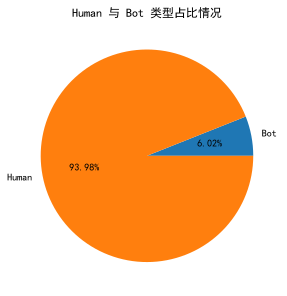

In [7]:
plt.pie([botdata.index.size,humandata.index.size],labels=['Bot','Human'],autopct="%0.2f%%")
plt.title("Human 与 Bot 类型占比情况")
plt.show()

- 选择原因：这里我想展现Human类型与Bot类型在项目中的占比情况，因此选择饼状图，可以直观地展现它们的百分比情况。
- 结果：这里我们可以看到，Human占比接近94%，而Bot占比为6%左右，Human的占比远高于Bot，说明github上面绝大多数项目依然是人为在创建和管理。

- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

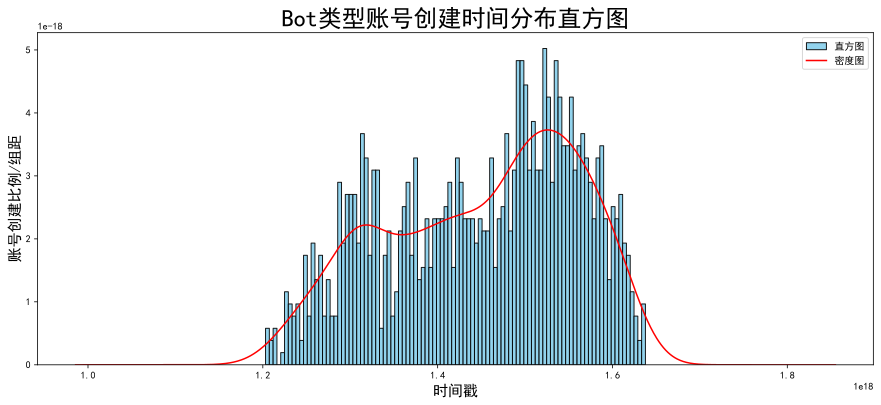

In [8]:
plt.figure(figsize=(15,6))
plt.hist(botdata['created_at'],histtype='bar',bins=100,color='skyblue', alpha=0.9,edgecolor = 'black',density=True,label='直方图')
botdata['created_at'].plot(kind='kde',label = '密度图',color='red')
plt.title('Bot类型账号创建时间分布直方图',fontsize=24)
plt.xlabel("时间戳",fontsize=15)
plt.ylabel("账号创建比例/组距",fontsize=15)
plt.legend()
plt.show()

- 选择原因：这里我想展示的每个时间段创建账号数目的趋势，因此我选择频率分布直方图，频率分布直方图（如上），可以直观地展示在某个时间段内账号创建比例，那些时间内账号创建多一目了然，并且也直观展现了不同时间段的差异，以及变化趋势。
- 结果：从上面这幅图可以看到，时间在1.5e18到1.6e18这段时间内，bot类型账号创建较多。

- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

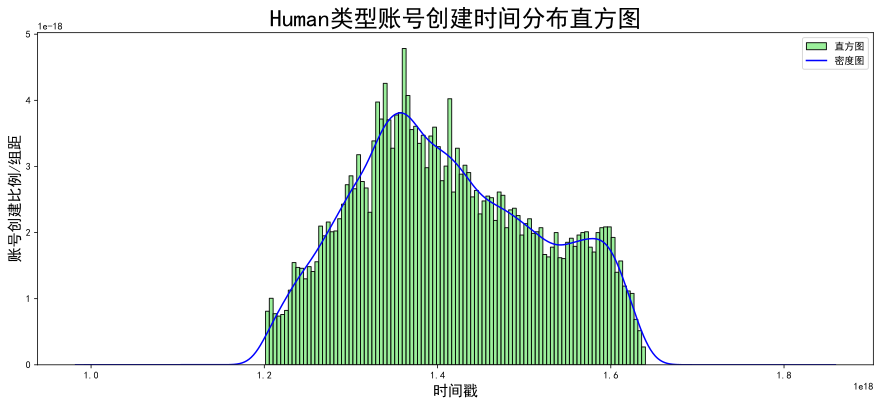

In [9]:
plt.figure(figsize=(15,6))
plt.hist(humandata['created_at'],histtype='bar',bins=100,color='lightgreen', alpha=0.9,edgecolor = 'black',density=True,label='直方图')
humandata['created_at'].plot(kind='kde',label = '密度图',color='blue')
plt.title('Human类型账号创建时间分布直方图',fontsize=24)
plt.xlabel("时间戳",fontsize=15)
plt.ylabel("账号创建比例/组距",fontsize=15)
plt.legend()
plt.show()

- 选择原因：这里原因跟上一个一样。
- 结果：这里发现human类型账号的创建时间主要集中在1.3e18到1.5e18。

- 这里再将4.2，4.3两幅图结合一下

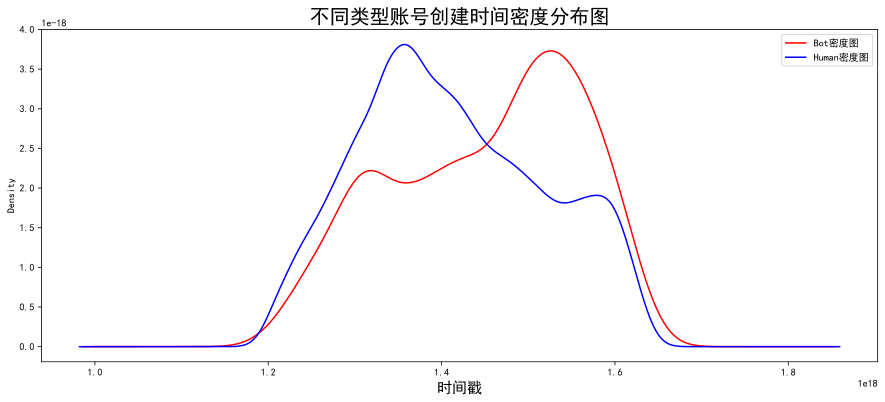

In [10]:
plt.figure(figsize=(15,6))
plt.title("不同类型账号创建时间密度分布图",fontsize=20)
botdata['created_at'].plot(kind='kde',label = 'Bot密度图',color='red')
humandata['created_at'].plot(kind='kde',label = 'Human密度图',color='blue')
plt.xlabel("时间戳",fontsize=15)
plt.legend()
plt.show()

- 这里可以看到，Human类型账号主要创建与前中期，而Bot类型账号主要创建于后期。

- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

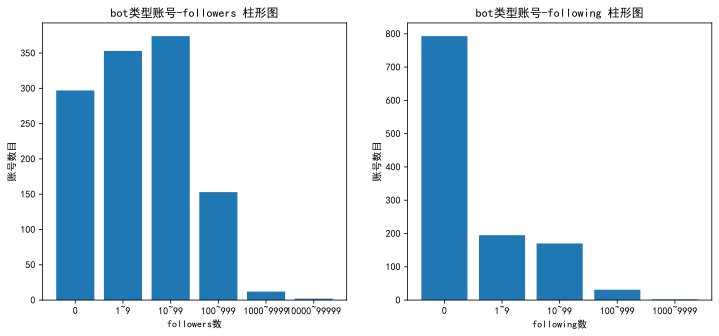

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
arr = [botdata['followers'][botdata['followers']==0].size]
labels = ["0"]
tmp = 1
while tmp<botdata['followers'].max():
    arr.append(botdata['followers'][botdata['followers']>=tmp][botdata['followers']<tmp*10].size)
    labels.append("{}~{}".format(tmp,tmp*10-1))
    tmp*=10
plt.bar(labels,arr)
plt.title("bot类型账号-followers 柱形图")
plt.ylabel("账号数目",fontsize=10)
plt.xlabel("followers数",fontsize=10)
plt.subplot(1,2,2)
arr = [botdata['following'][botdata['following']==0].size]
labels = ["0"]
tmp = 1
while tmp<botdata['following'].max():
    arr.append(botdata['following'][botdata['following']>=tmp][botdata['following']<tmp*10].size)
    labels.append("{}~{}".format(tmp,tmp*10-1))
    tmp*=10
plt.bar(labels,arr)
plt.title("bot类型账号-following 柱形图")
plt.ylabel("账号数目",fontsize=10)
plt.xlabel("following数",fontsize=10)
plt.show()

- 选择原因：这里我想展示不同followers数目和following的账号数目，因此使用柱形图，可以大致看到大多数账号的followers及following情况。
- 结果：这里可以发现，绝大多数账号的followers数集中在0~999，80%以上集中在0~99，因此大多数bot类型的账号followers数并不多,following的情况也是类似的。

- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

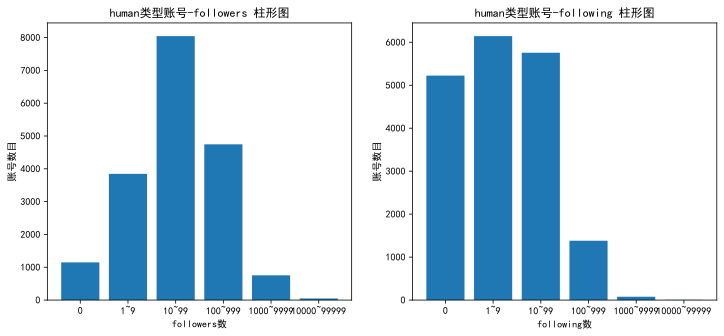

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
arr = [humandata['followers'][humandata['followers']==0].size]
labels = ["0"]
tmp = 1
while tmp<humandata['followers'].max():
    arr.append(humandata['followers'][humandata['followers']>=tmp][humandata['followers']<tmp*10].size)
    labels.append("{}~{}".format(tmp,tmp*10-1))
    tmp*=10
plt.bar(labels,arr)
plt.title("human类型账号-followers 柱形图")
plt.ylabel("账号数目",fontsize=10)
plt.xlabel("followers数",fontsize=10)
plt.subplot(1,2,2)
arr = [humandata['following'][humandata['following']==0].size]
labels = ["0"]
tmp = 1
while tmp<humandata['following'].max():
    arr.append(humandata['following'][humandata['following']>=tmp][humandata['following']<tmp*10].size)
    labels.append("{}~{}".format(tmp,tmp*10-1))
    tmp*=10
plt.bar(labels,arr)
plt.title("human类型账号-following 柱形图")
plt.ylabel("账号数目",fontsize=10)
plt.xlabel("following数",fontsize=10)
plt.show()

- 选择原因：跟前面一样
- 结果：这里可以发现，大多数human类型的账号followers数集中在1~999，其实跟bot类型差不多，而following数则集中在0~99。